# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create a list to store the json response for each city
responses = []

# Create base url
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

city_count = 0
for city in cities:
    url = base_url + f"{city}&units=metric&appid={weather_api_key}"
    city_data = requests.get(url).json()
    if city_data['cod'] == '404':
        print('City not found. Skipping...')
    else:
        responses.append(city_data)
        city_count += 1
        print(f"Processing record {city_count} | {city_data['name']}")

Processing record 1 | Busselton
Processing record 2 | Hofn
Processing record 3 | Uribia
Processing record 4 | Saint Paul Harbor
Processing record 5 | Saldanha
Processing record 6 | Bambous Virieux
Processing record 7 | East London
Processing record 8 | Ranau
Processing record 9 | Mossamedes
Processing record 10 | Barrow
Processing record 11 | Longyearbyen
Processing record 12 | Bluff
Processing record 13 | Skjervøy
City not found. Skipping...
Processing record 14 | Bredasdorp
City not found. Skipping...
Processing record 15 | Yārāda
Processing record 16 | Saint George
Processing record 17 | Thompson
Processing record 18 | Esim
Processing record 19 | Moba
Processing record 20 | Kununurra
Processing record 21 | Kyakhta
Processing record 22 | Provideniya
Processing record 23 | Yichun
Processing record 24 | Hobart
Processing record 25 | Tuktoyaktuk
Processing record 26 | Marsá Maţrūḩ
Processing record 27 | Nikolskoye
Processing record 28 | Deep River
Processing record 29 | Baruun-Urt
Proce

Processing record 234 | Luanda
City not found. Skipping...
Processing record 235 | Elizabeth City
Processing record 236 | Zhangye
Processing record 237 | Byron Bay
Processing record 238 | Mergen
Processing record 239 | Guerrero Negro
Processing record 240 | Sundsvall
Processing record 241 | Chiungutwa
Processing record 242 | San Juan Bautista
Processing record 243 | Airai
Processing record 244 | Henties Bay
Processing record 245 | Itoman
City not found. Skipping...
Processing record 246 | Trairi
Processing record 247 | Nicoya
Processing record 248 | Kavaratti
Processing record 249 | Salisbury
Processing record 250 | Duki
Processing record 251 | Makkah al Mukarramah
Processing record 252 | Constitución
Processing record 253 | Baiyin
Processing record 254 | Rincon
Processing record 255 | Solotcha
Processing record 256 | Linxia Chengguanzhen
City not found. Skipping...
Processing record 257 | Poum
Processing record 258 | Narasannapeta
Processing record 259 | Nara
Processing record 260 | S

Processing record 461 | Dunedin
Processing record 462 | Manokwari
Processing record 463 | Kaoma
Processing record 464 | Nome
Processing record 465 | Phuntsholing
Processing record 466 | Grants
Processing record 467 | Ulaanbaatar
Processing record 468 | Beringovskiy
Processing record 469 | Shangrao
Processing record 470 | Nakapiripirit
Processing record 471 | Christchurch
Processing record 472 | Kiryat Gat
City not found. Skipping...
Processing record 473 | Arauca
Processing record 474 | Houma
Processing record 475 | Mocorito
Processing record 476 | Nkowakowa
Processing record 477 | Togul
Processing record 478 | Zhaotong
Processing record 479 | Rybachiy
Processing record 480 | Biograd na Moru
Processing record 481 | Saint-François
Processing record 482 | Monrovia
Processing record 483 | Coquimbo
Processing record 484 | Half Moon Bay
Processing record 485 | Barra de Tecoanapa
Processing record 486 | Puerto Escondido
Processing record 487 | Balgazyn
Processing record 488 | Methóni
Process

In [4]:
responses[0]

{'coord': {'lon': 115.3333, 'lat': -33.65},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 10.58,
  'feels_like': 9.7,
  'temp_min': 10.58,
  'temp_max': 11.16,
  'pressure': 1016,
  'humidity': 77,
  'sea_level': 1016,
  'grnd_level': 1016},
 'visibility': 10000,
 'wind': {'speed': 3.68, 'deg': 205, 'gust': 4.59},
 'clouds': {'all': 76},
 'dt': 1633629606,
 'sys': {'type': 2,
  'id': 2020551,
  'country': 'AU',
  'sunrise': 1633643190,
  'sunset': 1633688745},
 'timezone': 28800,
 'id': 2075265,
 'name': 'Busselton',
 'cod': 200}

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create lists to store values
found_cities = []
lats = []
lngs = []
max_temps = []
humidities = []
clouds = []
wind_speeds = []
countries = []
dates = []


for i in range(city_count):
    response = responses[i]
    found_cities.append(response['name'])
    lats.append(response['coord']['lat'])
    lngs.append(response['coord']['lon'])
    max_temps.append(response['main']['temp_max'])
    humidities.append(response['main']['humidity'])
    clouds.append(response['clouds']['all'])
    wind_speeds.append(response['wind']['speed'])
    countries.append(response['sys']['country'])
    dates.append(response['dt'])
    
city_weather_data = pd.DataFrame({'City': found_cities,
                                  'Lat': lats,
                                  'Lng': lngs,
                                  'Max Temp': max_temps,
                                  'Humidity': humidities,
                                  'Cloudiness': clouds,
                                  'Wind Speed': wind_speeds,
                                  'Country': countries,
                                  'Date': dates})
city_weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,11.16,77,76,3.68,AU,1633629606
1,Hofn,64.2539,-15.2082,6.62,87,100,8.17,IS,1633629609
2,Uribia,11.7139,-72.2660,34.59,42,29,10.33,CO,1633629610
3,Saint Paul Harbor,57.7900,-152.4072,6.54,79,37,3.91,US,1633629375
4,Saldanha,-33.0117,17.9442,14.95,95,8,5.71,ZA,1633629611


In [6]:
city_weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,19.118441,17.904807,17.962451,69.153439,55.209877,3.594991,1.633630e+09
std,33.446789,90.666775,10.781464,22.022381,37.007688,2.633240,1.783837e+02
min,-54.800000,-175.200000,-19.000000,6.000000,0.000000,0.000000,1.633629e+09
25%,-9.438200,-64.366500,9.515000,59.000000,20.000000,1.705000,1.633629e+09
50%,24.466700,20.971400,20.150000,75.000000,63.000000,3.000000,1.633630e+09
75%,46.459450,100.403000,25.985000,86.000000,90.000000,4.630000,1.633630e+09
max,78.218600,179.316700,40.530000,100.000000,100.000000,16.980000,1.633630e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

Based on the summary table above, there are no cities where humidity > 100%!

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

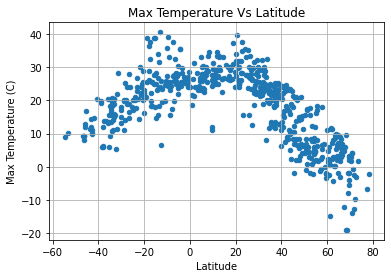

In [42]:
# Set x and y values
city_weather_data.plot('Lat', 'Max Temp', kind='scatter', xlabel='Latitude', ylabel='Max Temperature (C)', title='Max Temperature Vs Latitude', grid=True)
plt.show()

## Latitude vs. Humidity Plot

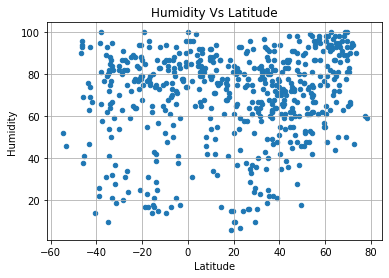

In [43]:
city_weather_data.plot('Lat', 'Humidity', kind='scatter', xlabel='Latitude', ylabel='Humidity (%)', title='Humidity Vs Latitude', grid=True)
plt.show()

## Latitude vs. Cloudiness Plot

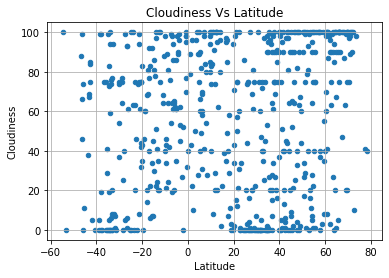

In [44]:
city_weather_data.plot('Lat', 'Cloudiness', kind='scatter', xlabel='Latitude', ylabel='Cloudiness (%)', title='Cloudiness Vs Latitude', grid=True)
plt.show()

## Latitude vs. Wind Speed Plot

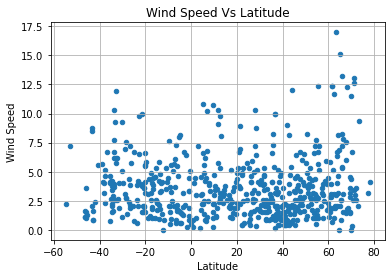

In [45]:
city_weather_data.plot('Lat', 'Wind Speed', kind='scatter', xlabel='Latitude', ylabel='Wind Speed (mph)', title='Wind Speed Vs Latitude', grid=True)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression